__What I want to do in this assignment with stats:__

This dataset looks at change in Temp, RH, and CO2 as the pipe organ's chapel is filling with an audience leading up to when the organ is played. Since I want to look for relationship between these two dependant variables, I will use either a parametric or nonparametric correlation analysis stats test.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc

%matplotlib inline

import statsmodels.api as sm

# irst, I have converted my data from .hobo to .csv with HOBOware software

In [101]:
#Upload the data into a Python datafrom from the .csv file I saved it int

CO2_data = pd.read_table('CO2test1.csv', sep=',')
CO2_data.head(n=6)#I look at the dataframe I've uploaded

,#,"Date Time, GMT-04:00",Temp,RH,CO2_1,CO2_2
0,1,03/26/10 01:05:00 PM,22.489,31.028,475.0,428.6
1,2,03/26/10 01:06:00 PM,22.585,30.232,512.2,431.0
2,3,03/26/10 01:07:00 PM,22.513,29.689,550.1,431.0
3,4,03/26/10 01:08:00 PM,22.393,29.544,586.7,432.8
4,5,03/26/10 01:09:00 PM,22.274,29.400,622.1,431.0
5,6,03/26/10 01:10:00 PM,22.130,29.254,655.7,428.6


In [112]:
#Look at the type of data in each column. It is a float, which is an interger with a decimal
CO2_data.dtypes

#                         int64
Date Time, GMT-04:00     object
Temp                    float64
RH                      float64
CO2_1                   float64
CO2_2                   float64
dtype: object

In [103]:
# Look at how CO2_2 and Temp change in relation to each other over time

To find out what type of statistical test(s) I should use, I want to first know if this data is parametric, or has normal distribution. I want to see if Temp and CO2 have a significant correlary relationship, so I will create a new dataframe with those data. 

In [104]:
# I create a dataframe with the data columns I want to test
#CO2_compare = CO2_data[['Date Time, GMT-04:00', 'Temp', 'CO2_1']]

CO2_compare = CO2_data[['Temp', 'CO2_1']]
CO2_compare.head()

,Temp,CO2_1
0,22.489,475.0
1,22.585,512.2
2,22.513,550.1
3,22.393,586.7
4,22.274,622.1


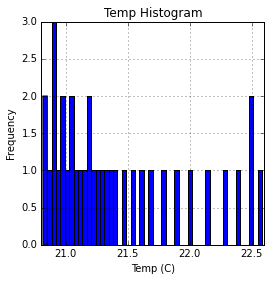

In [113]:
# I will first look to see if the data for Temp and CO2 are normally distributes by using histograms

#Temperature
figure = CO2_compare.hist(column='Temp', bins=50, figsize=(4,4))

plt.ylabel('Frequency')
plt.xlabel('Temp (C)')

plt.title('Temp Histogram')

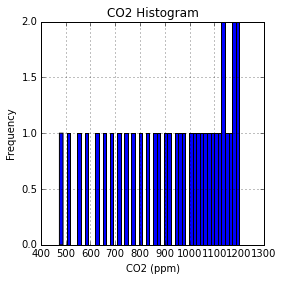

In [115]:
# Histogram of CO2
CO2_compare.hist(column='CO2_1', bins=50, figsize=(4,4))

plt.ylabel('Frequency')
plt.xlabel('CO2 (ppm)')

plt.title('CO2 Histogram')

We can see that neither temperature or CO2 values follow normal distribution (a convex bell-curve) so looking at regression would not provide insight into the statistical significance of this data. 

If I wanted to be they are not normally distributed, I would also do a Shapiro Wilk test. Here I will skip to a __Spearman's test__ to look for correlation between Temp and CO2.

In [128]:
# Spearman test of correlation between temperature and CO2 concentration

Temp = CO2_compare['Temp']
CO2 = CO2_compare['CO2_1']

sc.spearmanr(Temp, CO2) 

(-0.99916339739688431, 8.5231190084510961e-49)

The p value (second value presented) is << 0.05, so I can say that the correlation between temperature and CO2 concentration change is statistically significant. To check futher, I can graph them together to see if there is positive or negative correlation.

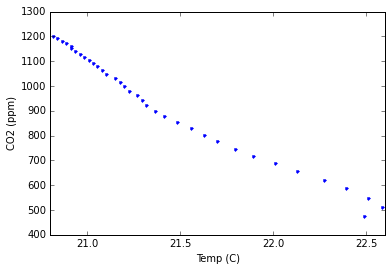

In [127]:
#correlated items will have slope, non will be flat 

plt.plot(Temp, CO2, linestyle=' ', marker='.') 

plt.ylabel('CO2 (ppm)')
plt.xlabel('Temp (C)')

This slope confirms there is high positive correlation between change in temperature and CO2 concentration in the church during the hour of measurements. It is positive because temp and CO2 have the same, negative slope. The presence of a slope shows there is parrallel change in both measured variables.